In [ ]:
#! Using dataset 
import os, glob
from skimage import io

base_train = r"C:/Users/sagar/OneDrive/Documents/archive (4)/Dataset/train"
base_test  = r"C:/Users/sagar/OneDrive/Documents/archive (4)/Dataset/test"

classes = {
    "airplanes": ["airplanes", "airplanes"],
    "cars": ["cars", "cars"],
    "ships": ["ship", "ships"]
}

all_files = {}
for cls, (train_folder, test_folder) in classes.items():
    files = glob.glob(os.path.join(base_train, train_folder, "*.jpg")) + glob.glob(os.path.join(base_test, test_folder, "*.jpg"))
    all_files[cls] = files

sample_files = [all_files[cls][0] for cls in all_files]
sample_files








['C:/Users/sagar/OneDrive/Documents/archive (4)/Dataset/train\\airplanes\\airplane1.jpg',
 'C:/Users/sagar/OneDrive/Documents/archive (4)/Dataset/train\\cars\\23-250x250.jpg',
 'C:/Users/sagar/OneDrive/Documents/archive (4)/Dataset/train\\ship\\1001524.jpg']

In [13]:
from skimage import color, img_as_float

images_gray = []
for f in sample_files:
    I = io.imread(f)
    if I.ndim == 3:
        I = color.rgb2gray(I)
    I = img_as_float(I)
    images_gray.append(I)






In [14]:
from skimage import filters
import numpy as np

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

angles = []
for I in images_gray:
    dx = filters.sobel_h(I)
    dy = filters.sobel_v(I)
    ang = angle(dx, dy)
    angles.append(ang)



In [16]:
hists = []
for ang in angles:
    h, _ = np.histogram(ang, bins=36, range=(0, np.pi))
    hists.append(h / h.sum())


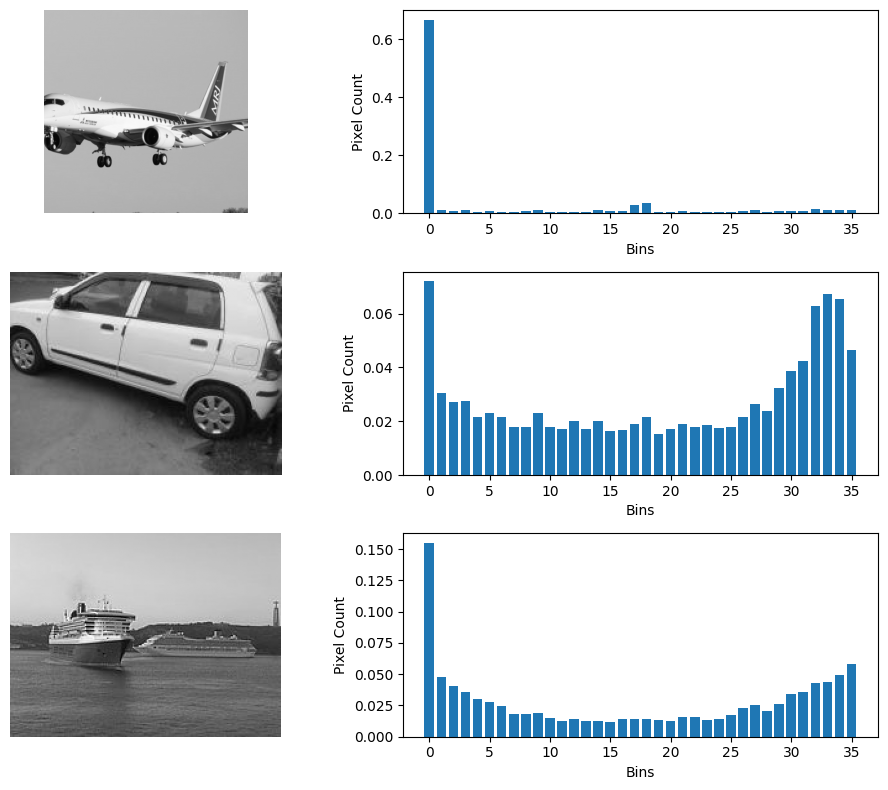

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i, I in enumerate(images_gray):
    plt.subplot(len(images_gray), 2, 2*i+1)
    plt.imshow(I, cmap='gray')
    plt.axis('off')
    plt.subplot(len(images_gray), 2, 2*i+2)
    plt.bar(range(36), hists[i])
    plt.xlabel("Bins")
    plt.ylabel("Pixel Count")
plt.tight_layout()
plt.show()



In [18]:
from sklearn.metrics import pairwise_distances

a = hists[0].reshape(1,-1)
b = hists[1].reshape(1,-1)

print("Euclidean:", pairwise_distances(a,b,metric='euclidean')[0][0])
print("Manhattan:", pairwise_distances(a,b,metric='manhattan')[0][0])
print("Cosine:", pairwise_distances(a,b,metric='cosine')[0][0])


Euclidean: 0.6097261791986014
Manhattan: 1.2410121556473828
Cosine: 0.5521479583068247


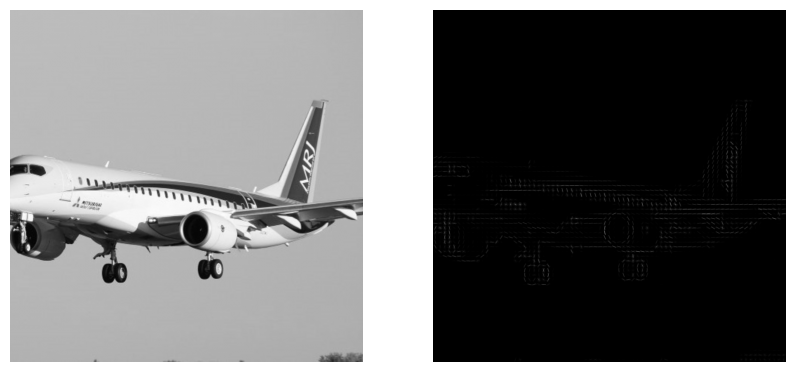

197136

In [19]:
from skimage import feature
import matplotlib.pyplot as plt

I = images_gray[0]

hog_vec, hog_img = feature.hog(I, orientations=9, pixels_per_cell=(16,16),
                               cells_per_block=(2,2), block_norm='L2-Hys',
                               visualize=True, feature_vector=True)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(hog_img, cmap='gray')
plt.axis('off')
plt.show()

hog_vec.size


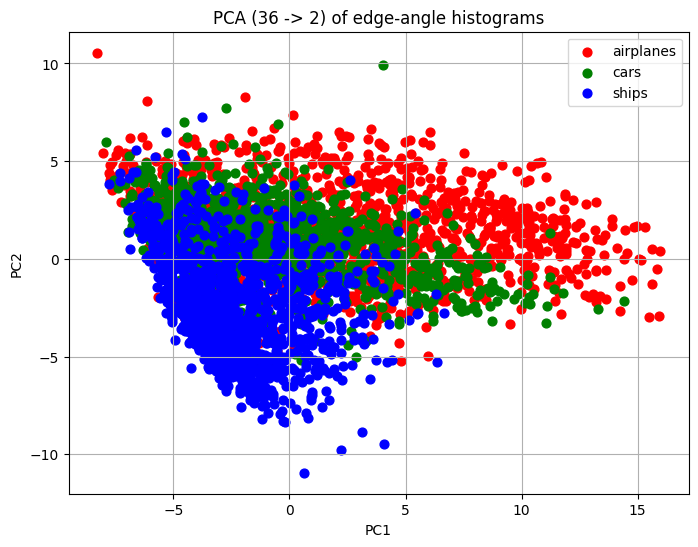

array([0.58125261, 0.22817894])

In [20]:
import os, glob
from skimage import io, color, img_as_float, filters
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

base_train = r"C:/Users/sagar/OneDrive/Documents/archive (4)/Dataset/train"
base_test  = r"C:/Users/sagar/OneDrive/Documents/archive (4)/Dataset/test"

classes = {
    "airplanes": ["airplanes", "airplanes"],
    "cars": ["cars", "cars"],
    "ships": ["ship", "ships"]
}

all_files = {}
for cls, (train_folder, test_folder) in classes.items():
    files = glob.glob(os.path.join(base_train, train_folder, "*.jpg")) + glob.glob(os.path.join(base_train, train_folder, "*.png")) + glob.glob(os.path.join(base_test, test_folder, "*.jpg")) + glob.glob(os.path.join(base_test, test_folder, "*.png"))
    all_files[cls] = files

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

def compute_hist(I, bins=36):
    dx = filters.sobel_h(I)
    dy = filters.sobel_v(I)
    ang = angle(dx, dy)
    h, _ = np.histogram(ang, bins=bins, range=(0, np.pi))
    return h / h.sum()

X = []
y = []
for idx, cls in enumerate(all_files):
    for f in all_files[cls]:
        I = io.imread(f)
        if I.ndim == 3:
            I = color.rgb2gray(I)
        I = img_as_float(I)
        X.append(compute_hist(I, bins=36))
        y.append(idx)

X = np.array(X)
y = np.array(y)
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=0)
X2 = pca.fit_transform(X_scaled)

colors = ['red','green','blue']
plt.figure(figsize=(8,6))
for idx, cls in enumerate(all_files):
    pts = X2[y==idx]
    plt.scatter(pts[:,0], pts[:,1], s=40, label=cls, c=colors[idx])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA (36 -> 2) of edge-angle histograms")
plt.grid(True)
plt.show()

pca.explained_variance_ratio_


In [ ]:
#This is only 1 class (ships) that is visually separable.The other two classes (airplanes and cars) are not that separated.

In [ ]:
#2some text processing steps on a tweet (i.e., text) dataset. The dataset file is in json
format and each dataset consists of
• Training Set: 3,000 records
• Test Set: 1,500 records
• Validation Set: 400 records

In [22]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [25]:
with open("C:/Users/sagar/OneDrive/Documents/train.json", "r", encoding="utf-8") as f:
    records = [json.loads(line) for line in f]
df = pd.DataFrame(records)
print("Number of records:", len(df))

Number of records: 3000


In [26]:
texts = df["Tweet"].astype(str).tolist()
cv = CountVectorizer()
tfidf = TfidfVectorizer()
X_count = cv.fit_transform(texts)
X_tfidf = tfidf.fit_transform(texts)
print("CountVectorizer dimensionality:", X_count.shape[1])
print("TfidfVectorizer dimensionality:", X_tfidf.shape[1])

CountVectorizer dimensionality: 9722
TfidfVectorizer dimensionality: 9722


In [27]:
chosen_classes = ["disgust", "optimism", "love", "trust"]
df["label"] = None
for c in chosen_classes:
    df.loc[df[c] == True, "label"] = c
subset = df[df["label"].isin(chosen_classes)]
print("Samples per chosen class:\n", subset["label"].value_counts())

Samples per chosen class:
 label
disgust     1041
optimism     602
love         263
trust        167
Name: count, dtype: int64


In [28]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_count_2d = svd.fit_transform(X_count[subset.index])
X_tfidf_2d = svd.fit_transform(X_tfidf[subset.index])

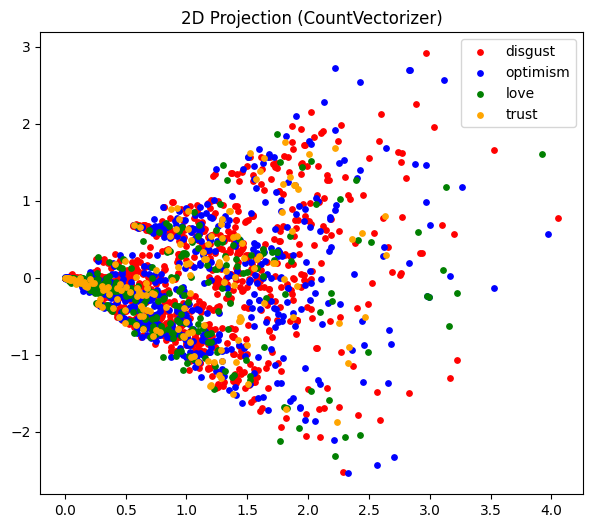

In [32]:
colors = {"disgust":"red","optimism":"blue","love":"green","trust":"orange"}
plt.figure(figsize=(7,6))
for c in chosen_classes:
    mask = subset["label"] == c
    plt.scatter(X_count_2d[mask,0], X_count_2d[mask,1], c=colors[c], label=c, s=15)
plt.title("2D Projection (CountVectorizer)")
plt.legend()
plt.show()

In [ ]:
#All the classes cannot be separated visually (non-overlapping). The overlap in both dimensions is very high in all four categories.

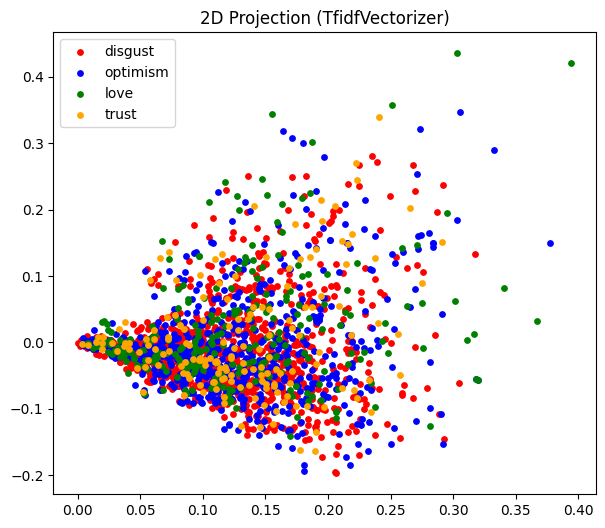

In [33]:
plt.figure(figsize=(7,6))
for c in chosen_classes:
    mask = subset["label"] == c
    plt.scatter(X_tfidf_2d[mask,0], X_tfidf_2d[mask,1], c=colors[c], label=c, s=15)
plt.title("2D Projection (TfidfVectorizer)")
plt.legend()
plt.show()

In [ ]:
# same for this plot as well, lasses cannot be separated visually.
